In [1]:
# import requests
# import time
# import pandas as pd

# client_id = 'UZT7eG9q65gEwOc5IQgiKA'
# client_secret = 'EsaTm6IWzG9LCXn0-s2i9TLeV2agRg'
# username = 'rajender2003'
# password = 'Prreddy@2712'
# user_agent = 'CommentExtractor:v2.0 (by u/rajender2003)'

# # Step 1: Authenticate and get access token
# auth = requests.auth.HTTPBasicAuth(client_id, client_secret)
# data = {'grant_type': 'password', 'username': username, 'password': password}
# headers = {'User-Agent': user_agent}

# res = requests.post('https://www.reddit.com/api/v1/access_token', auth=auth, data=data, headers=headers)
# TOKEN = res.json()['access_token']
# headers['Authorization'] = f'bearer {TOKEN}'

# # List of subreddits to scrape
# subreddits = ['AskReddit', 'AmItheAsshole', 'worldnews', 'gaming', 'movies']

# # Number of comments to collect from each subreddit
# COMMENTS_PER_SUBREDDIT = 10000

# # Helper function to fetch comments
# def fetch_comments_from_subreddit(subreddit, target=COMMENTS_PER_SUBREDDIT):
#     print(f"\nCollecting comments from r/{subreddit}...")
#     all_comments = []
#     after = None
#     post_count = 1

#     while len(all_comments) < target:
#         params = {'limit': 50}
#         if after:
#             params['after'] = after

#         try:
#             posts_res = requests.get(f"https://oauth.reddit.com/r/{subreddit}/hot",
#                                      headers=headers, params=params)
#             posts = posts_res.json().get('data', {}).get('children', [])
#         except Exception as e:
#             pass
#             break

#         if not posts:
#             print("No more posts found.")
#             break

#         for post in posts:
#             post_id = post['data']['id']
#             post_title = post['data']['title']

#             # Fetch comments
#             try:
#                 comments_res = requests.get(f"https://oauth.reddit.com/comments/{post_id}",
#                                             headers=headers, params={'limit': 500})
#                 comments_json = comments_res.json()

#                 # Sometimes Reddit returns empty or malformed response
#                 if len(comments_json) < 2:
#                     continue

#                 comment_items = comments_json[1]['data']['children']
#                 for item in comment_items:
#                     if item['kind'] != 't1':
#                         continue
#                     body = item['data'].get('body')
#                     if body and body not in ['[removed]', '[deleted]']:
#                         all_comments.append({
#                             'subreddit': subreddit,
#                             'post_id': post_id,
#                             'post_title': post_title,
#                             'comment': body,
#                             'score': item['data'].get('score'),
#                             'author': item['data'].get('author'),
#                             'created_utc': item['data'].get('created_utc')
#                         })

#                 print(f"post-{post_count}: +{len(comment_items)} comments | Total: {len(all_comments)}")
#                 post_count += 1

#                 # Stop early if target reached
#                 if len(all_comments) >= target:
#                     break

#                 # Be nice to Reddit API
#                 time.sleep(2)

#             except Exception as e:
#                 pass
#                 time.sleep(1)
#                 continue

#         after = posts[-1]['data']['name']
#         time.sleep(0.1)

#     return all_comments


# # Step 2: Loop through subreddits and collect comments
# all_data = []

# for sub in subreddits:
#     comments = fetch_comments_from_subreddit(sub)
#     all_data.extend(comments)

# # Step 3: Save to CSV
# df = pd.DataFrame(all_data)
# df.to_csv("reddit_comments_multi_subs.csv", index=False)

# print(f"\nTotal comments collected: {len(df)}")

In [3]:
import nltk
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import string

# Download NLTK data
nltk.download("punkt")
nltk.download("punkt_tab")

ModuleNotFoundError: No module named 'gensim'

In [ ]:
import pandas as pd
df = pd.read_csv("/content/reddit_comments_multi_subs.csv")

In [ ]:
df.shape

(47970, 7)

In [ ]:
df.head()

,subreddit,post_id,post_title,comment,score,author,created_utc
0,AskReddit,1ogviqe,"What is a ww2 fact that no one will believe, b...",The only recording ever made of Hitler speakin...,5976,n00chness,1.761519e+09
1,AskReddit,1ogviqe,"What is a ww2 fact that no one will believe, b...",The chief chemist at the Vemork heavy water pl...,11177,Western-Hurry4328,1.761518e+09
2,AskReddit,1ogviqe,"What is a ww2 fact that no one will believe, b...",Deputy Fuhrer Rudolf Hess was a really weird g...,3150,Jon__Snuh,1.761514e+09
3,AskReddit,1ogviqe,"What is a ww2 fact that no one will believe, b...",Most of the sea mines and torpedoes of the tim...,4952,BlackThunder_,1.761516e+09
4,AskReddit,1ogviqe,"What is a ww2 fact that no one will believe, b...","In 1944, a liberty ship containing 1400 tons o...",3362,gdx4259,1.761518e+09


In [ ]:
df = df.drop(columns = ["subreddit","post_id","post_title","score","author","created_utc"])

In [ ]:
df.isnull().sum()

,0
comment,2


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.duplicated().sum()

np.int64(919)

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum()

np.int64(0)

**Preprocessing**

In [ ]:
# Converting into lower case

df["comment"] = df["comment"].str.lower()

In [ ]:
# Removing punctuations, special characters, urls, hashtags
import re

def removing(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'\@\w+|\#','', text)  # Remove @mentions and hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters & numbers
    text = re.sub(r'\n','',text)
    text = re.sub(r'\xa0','',text)
    return text
df["comment"] = df["comment"].apply(removing)

In [ ]:
# Tokenization
import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt")
nltk.download("punkt_tab")

def tokenizer(text):
    text = word_tokenize(text)
    return text

df["comment"] = df["comment"].apply(tokenizer)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
# Stop words removal
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def stop_words_removal(words_list):
    words_list = [word for word in words_list if word not in stop_words]
    return words_list

df["comment"] = df["comment"].apply(stop_words_removal)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Applying Lemmatizer
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
lemmatizer = WordNetLemmatizer()

def lemmatization(words_list):
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words_list]
    return lemmatized_words

df["comment"] = df["comment"].apply(lemmatization)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def string_format(words_list):
    return " ".join(words_list)

df["comment"] = df["comment"].apply(string_format)

In [ ]:
df.duplicated().sum()

np.int64(1215)

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_vader(text):
    # from -1 (most negative) to +1 (most positive).
    score = analyzer.polarity_scores(text)['compound']

    # Use a more standard threshold
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

# Apply the NEW labeling function
df['sentiment'] = df['comment'].apply(get_sentiment_vader)

In [ ]:
df["sentiment"].value_counts()

,count
sentiment,
positive,19429
negative,13720
neutral,12685


In [ ]:
df.isnull().sum()

,0
comment,0
sentiment,0


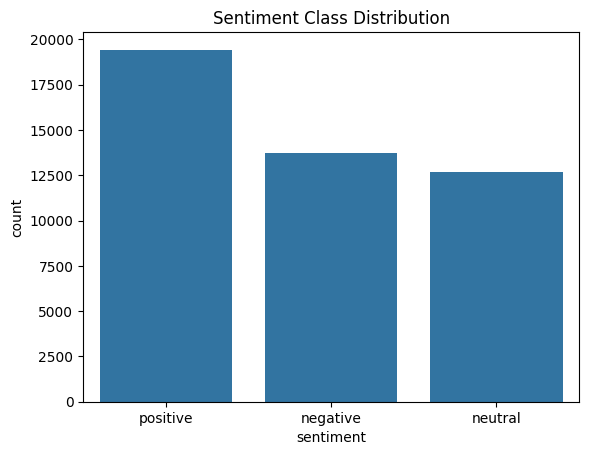

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='sentiment')
plt.title("Sentiment Class Distribution")
plt.show()

In [ ]:
def splitting(comment):
    return comment.split()

df["comment"] = df["comment"].apply(splitting)


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
df, _ = rus.fit_resample(df, df['sentiment'])

In [ ]:
df["sentiment"].value_counts()

,count
sentiment,
negative,12685
neutral,12685
positive,12685


In [ ]:
df["sentiment"] = df["sentiment"].map({"positive":1,"negative":0,"neutral":2})

In [ ]:
X = df["comment"]
y = df["sentiment"]

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=42)

95% of comments have 53 words or less.


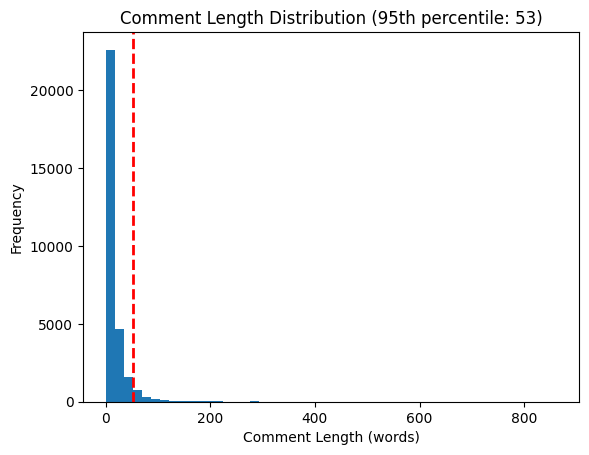

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Re-split X_train into words to check lengths
comment_lengths = [len(comment) for comment in X_train]

# Get the 95th percentile
maxlen_95th = int(pd.Series(comment_lengths).quantile(0.95))
print(f"95% of comments have {maxlen_95th} words or less.")

# --- USE THIS VALUE in your code ---
maxlen = maxlen_95th # (This will probably be much less than 300)

# (Optional) Plot a histogram
plt.hist(comment_lengths, bins=50)
plt.xlabel('Comment Length (words)')
plt.ylabel('Frequency')
plt.axvline(maxlen, color='red', linestyle='dashed', linewidth=2)
plt.title(f'Comment Length Distribution (95th percentile: {maxlen})')
plt.savefig('comment_length_distribution.png')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np


vocab_size = 15000  # Define the size of your vocabulary
maxlen = 60       # Cut reviews after 60 words
oov_token = "<OOV>" # Token for words not in the vocabulary

# Initialize and fit the tokenizer on the training text
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)

# Convert training and testing text to integer sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input length
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen, dtype='int32', padding='post', truncating='post', value=0)
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen, dtype='int32', padding='post', truncating='post', value=0)

print(f"Padded X_train shape: {X_train_pad.shape}")
print(f"Padded X_test shape: {X_test_pad.shape}")



# Building theLSTM model

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen),
    SpatialDropout1D(0.2),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(3, activation='softmax')
])

# Compile model

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

# Train the model
print("\nTraining model...")
history = model.fit(X_train_pad, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.2
                    )

# Evaluate the model
print("\nEvaluating model...")
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test accuracy: {accuracy:.4f}')


Padded X_train shape: (30444, 60)
Padded X_test shape: (7611, 60)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Training model...
Epoch 1/20
381/381 ━━━━━━━━━━━━━━━━━━━━ 64s 147ms/step - accuracy: 0.3990 - loss: 1.0655 - val_accuracy: 0.3777 - val_loss: 1.0897
Epoch 2/20
381/381 ━━━━━━━━━━━━━━━━━━━━ 40s 104ms/step - accuracy: 0.4291 - loss: 1.0415 - val_accuracy: 0.5310 - val_loss: 0.9286
Epoch 3/20
381/381 ━━━━━━━━━━━━━━━━━━━━ 42s 109ms/step - accuracy: 0.5383 - loss: 0.8934 - val_accuracy: 0.5866 - val_loss: 0.7591
Epoch 4/20
381/381 ━━━━━━━━━━━━━━━━━━━━ 40s 104ms/step - accuracy: 0.6283 - loss: 0.6856 - val_accuracy: 0.6354 - val_loss: 0.6863
Epoch 5/20
381/381 ━━━━━━━━━━━━━━━━━━━━ 46s 118ms/step - accuracy: 0.6729 - loss: 0.5947 - val_accuracy: 0.6308 - val_loss: 0.6895
Epoch 6/20
381/381 ━━━━━━━━━━━━━━━━━━━━ 76s 103ms/step - accuracy: 0.7437 - loss: 0.5318 - val_accuracy: 0.7704 - val_loss: 0.6053
Epoch 7/20
381/381 ━━━━━━━━━━━━━━━━━━━━ 42s 107ms/step - accuracy: 0.8442 - loss: 0.4142 - val_accuracy: 0.8083 - val_loss: 0.5619
Epoch 8/20
381/381 ━━━━━━━━━━━━━━━━━━━━ 40s 104ms/step - accurac

In [ ]:
import pickle
from tensorflow.keras.models import save_model

# --- 1. Save the Keras Model ---
model.save('sentiment_lstm_model.keras')

# --- 2. Save the Tokenizer (as a pickle file) ---
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)